# <center> Titanic Dataset Analysis </center>

## Problem Statement:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Importing the libraries:

In [1097]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [1098]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Importing the dataset:

In [1099]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1100]:
df.shape

(891, 12)

In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values:

In [1102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking for duplicates:

In [1103]:
df.duplicated().sum()

0

In [1104]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Visualisation:

Correlation between variables:

<Axes: >

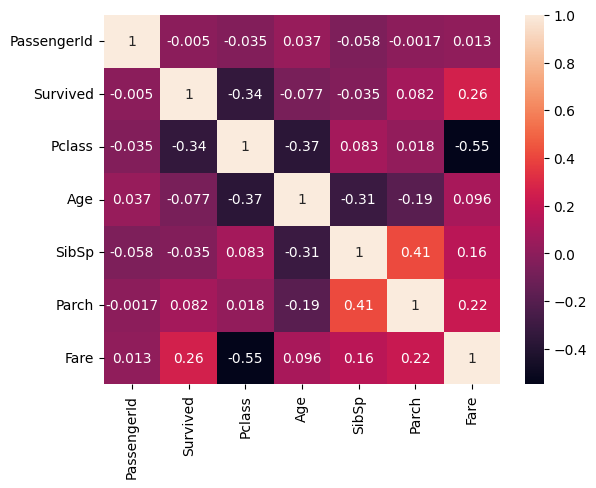

In [1105]:
sns.heatmap(df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr(), annot=True)

Survival Rate:

In [1106]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [1107]:
print(f'Percentage of People who Survived {df.Survived.sum()/df.Survived.count() *100}')

Percentage of People who Survived 38.38383838383838


Text(0.5, 1.0, 'Number of People who Survived')

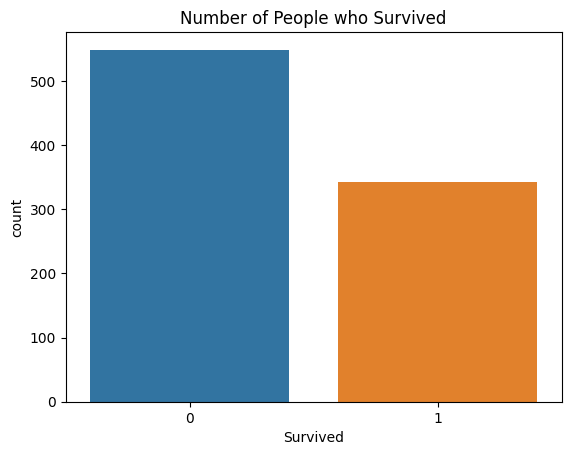

In [1108]:
sns.countplot(df, x='Survived')
plt.title('Number of People who Survived')

Survival Rate by Gender:

In [1109]:
df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [1110]:
print('% of Male who Survived: ', )
print('% of Female who Survived: ', )

% of Male who Survived: 
% of Female who Survived: 


Text(0.5, 1.0, 'Number of People who Survived by Gender')

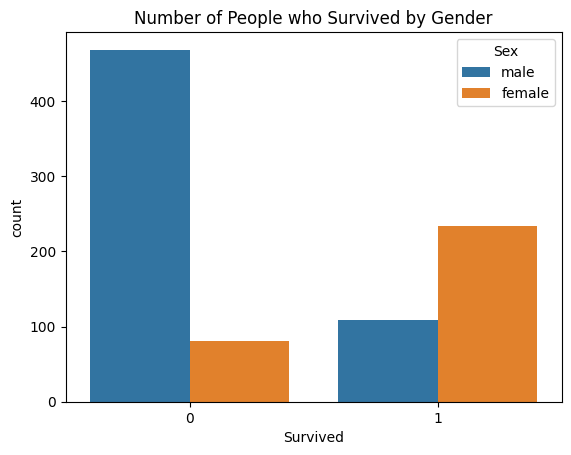

In [1111]:
sns.countplot(df, x='Survived', hue='Sex')
plt.title('Number of People who Survived by Gender')

Survival Rate by Passenger Class:

Text(0.5, 1.0, 'Number of People who Survived by Passenger Class')

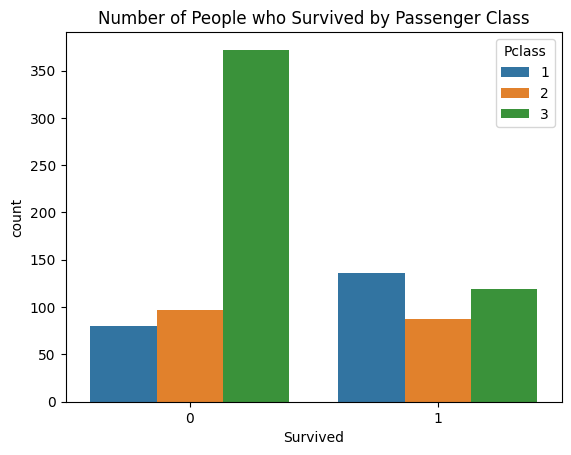

In [1112]:
sns.countplot(df, x='Survived', hue='Pclass')
plt.title('Number of People who Survived by Passenger Class')

Text(0.5, 1.0, 'Number of People who Survived by Passenger Class and Gender')

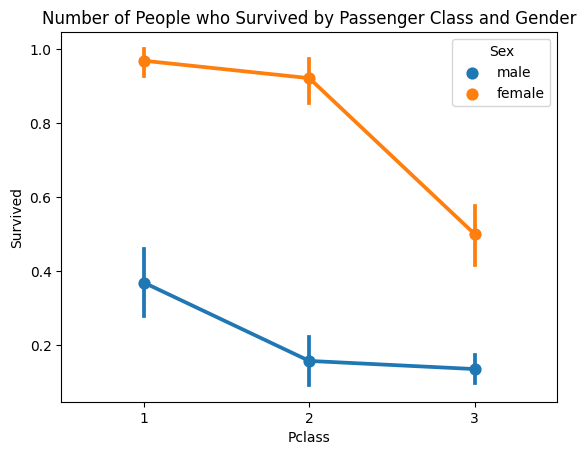

In [1113]:
sns.pointplot(df, x='Pclass', y='Survived', hue='Sex')
plt.title('Number of People who Survived by Passenger Class and Gender')

Distribution of Age:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Age')

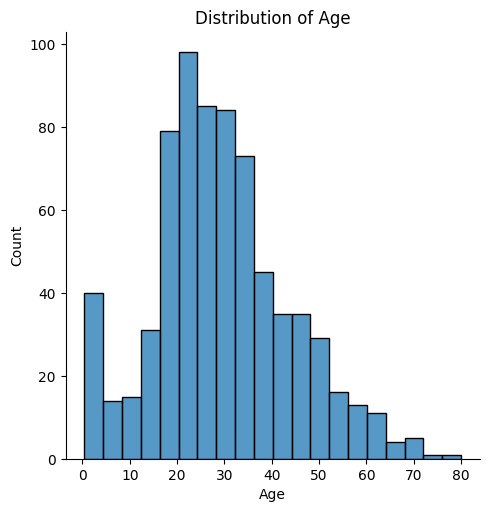

In [1114]:
sns.displot(df, x='Age')
plt.title('Distribution of Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Fare')

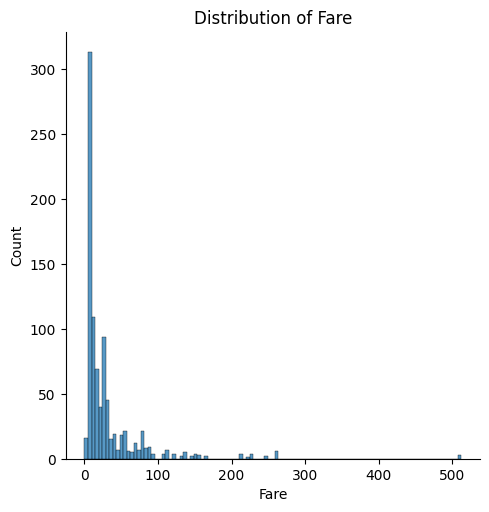

In [1115]:
sns.displot(df, x='Fare')
plt.title('Distribution of Fare')

Number of Spouses/Siblings:

Text(0.5, 0, 'Siblings / Spouses')

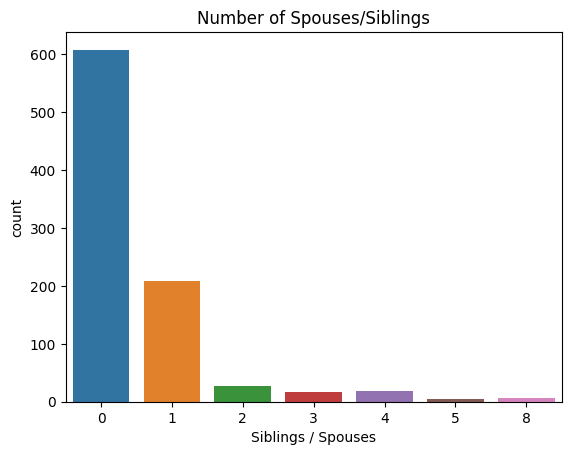

In [1116]:
sns.countplot(df, x='SibSp')
plt.title('Number of Spouses/Siblings')
plt.xlabel('Siblings / Spouses')

Text(0.5, 0, 'Siblings / Spouses')

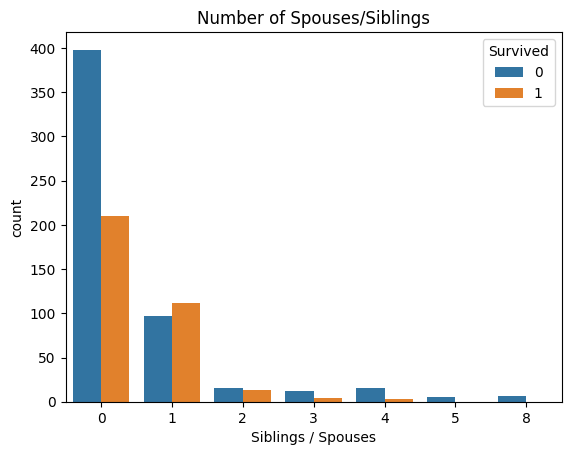

In [1117]:
sns.countplot(df, x='SibSp', hue='Survived')
plt.title('Number of Spouses/Siblings')
plt.xlabel('Siblings / Spouses')

Number of Parents/Childer:

Text(0.5, 0, 'Parents / Children')

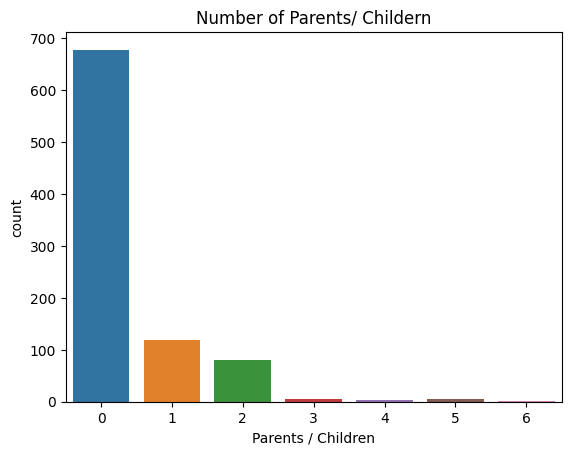

In [1118]:
sns.countplot(df, x='Parch')
plt.title('Number of Parents/ Childern')
plt.xlabel('Parents / Children')

Text(0.5, 0, 'Parents / Children')

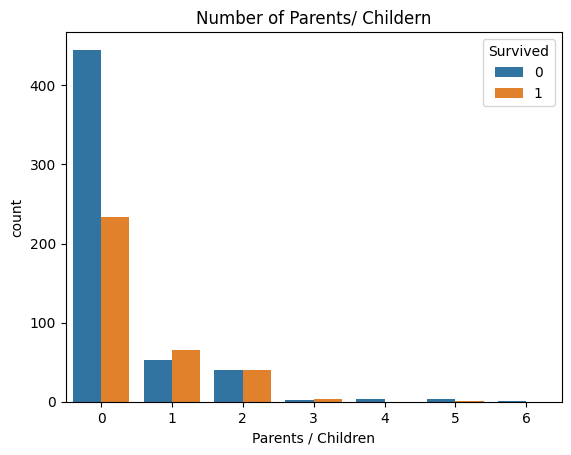

In [1119]:
sns.countplot(df, x='Parch', hue='Survived')
plt.title('Number of Parents/ Childern')
plt.xlabel('Parents / Children')

## Data Cleaning:

In [1120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Three columns contain null values: Age, Cabin and Embarked.

#### For the embarked column: 

It represents the port of embarkation:
C = Cherbourg, Q = Queenstown, S = Southampton

In [1121]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Filling the null Embarked values with the most occured value i.e., 'S'

In [1122]:
df.fillna({'Embarked': 'S'}, inplace=True)

#### For the Age Column:

In [1123]:
df.Age.mean()

29.69911764705882

<Axes: xlabel='Pclass', ylabel='Age'>

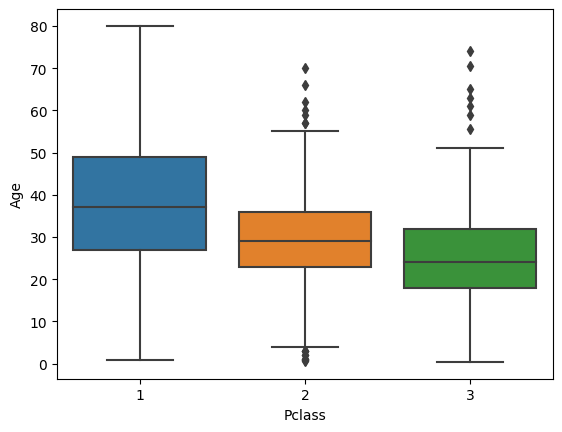

In [1124]:
sns.boxplot(df, x='Pclass', y='Age')

In [1125]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [1126]:
for i in df['Pclass']:
    if i == 1:
        df.fillna({'Age': 37}, inplace=True)
    elif i == 2:
        df.fillna({'Age': 30}, inplace=True)
    elif i == 3:
        df.fillna({'Age': 26}, inplace=True)

Filling the null Age values based on the mean value in their passenger class.

#### For the Cabin Column:

In [1127]:
df.drop('Cabin', axis=1, inplace=True)

In [1128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1129]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


#### Splitting the Dataset:

In [1130]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

In [1131]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Column Transformations:

In [1132]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [1133]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [1134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [1135]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,True,False,True
733,2,23.0,0,0,13.0000,True,False,True
382,3,32.0,0,0,7.9250,True,False,True
704,3,26.0,1,0,7.8542,True,False,True
813,3,6.0,4,2,31.2750,False,False,True


## Model Building:

In [1136]:
model_acc = {}

### 1. Logistic Regression

In [1137]:
logreg = LogisticRegression()

In [1138]:
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1139]:
y_logreg_pred = logreg.predict(X_test)

In [1140]:
model_acc['Logistic Regression'] = accuracy_score(y_test, y_logreg_pred)

In [1141]:
confusion_matrix(y_test, y_logreg_pred)

array([[89, 16],
       [20, 54]])

In [1142]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### 2. Support Vector Machine

In [1143]:
svc = SVC()

In [1144]:
svc.fit(X_train, y_train)

SVC()

In [1145]:
y_svc_pred = svc.predict(X_test)

In [1146]:
model_acc['Support Vector Machine'] = accuracy_score(y_test, y_svc_pred)

In [1147]:
confusion_matrix(y_test, y_svc_pred)

array([[99,  6],
       [56, 18]])

In [1148]:
print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



### 3. K Nearest Neighbors Classifier

In [1149]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [1150]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1151]:
y_knn_pred = knn.predict(X_test)

In [1152]:
model_acc['KNN Classifier'] = accuracy_score(y_test, y_knn_pred)

In [1153]:
confusion_matrix(y_test, y_knn_pred)

array([[92, 13],
       [39, 35]])

In [1154]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       105
           1       0.73      0.47      0.57        74

    accuracy                           0.71       179
   macro avg       0.72      0.67      0.68       179
weighted avg       0.71      0.71      0.69       179



### 4. Naive Bayes

In [1155]:
gauss = GaussianNB()

In [1156]:
gauss.fit(X_train, y_train)

GaussianNB()

In [1157]:
y_nb_pred = gauss.predict(X_test)

In [1158]:
model_acc['Naive Bayes'] = accuracy_score(y_test, y_nb_pred)

In [1159]:
confusion_matrix(y_test, y_nb_pred)

array([[84, 21],
       [20, 54]])

In [1160]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### 5. Decision Tree

In [1161]:
dtc = DecisionTreeClassifier()

In [1162]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [1163]:
y_decisiontree_pred = dtc.predict(X_test)

In [1164]:
model_acc['Decision Tree'] = accuracy_score(y_test, y_decisiontree_pred)

In [1165]:
confusion_matrix(y_test, y_decisiontree_pred)

array([[84, 21],
       [19, 55]])

In [1166]:
print(classification_report(y_test, y_decisiontree_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### 6. Random Forest Classifier

In [1167]:
rfc = RandomForestClassifier()

In [1168]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [1169]:
y_randomforest_pred = rfc.predict(X_test)

In [1170]:
model_acc['Random Forest Classifier'] = accuracy_score(y_test, y_randomforest_pred)

In [1171]:
confusion_matrix(y_test, y_randomforest_pred)

array([[90, 15],
       [18, 56]])

In [1172]:
print(classification_report(y_test, y_randomforest_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



#### Comparing the accuracy of models:

In [1173]:
model_acc

{'Logistic Regression': 0.7988826815642458,
 'Support Vector Machine': 0.6536312849162011,
 'KNN Classifier': 0.7094972067039106,
 'Naive Bayes': 0.770949720670391,
 'Decision Tree': 0.776536312849162,
 'Random Forest Classifier': 0.8156424581005587}

Random Forest has the highest accuracy.

In [1174]:
output = pd.DataFrame({'PassengerId': X_test.index +1, 'Survived': y_randomforest_pred})
output.to_csv('submission.csv', index=False)